# AI ASSIGNMENT 2 EXPLORATORY DATA ANALYSIS (EDA)

IMPORTING PACKAGES

In [6]:
import pandas as pd
import seaborn  as sns
import matplotlib.pyplot as plt

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3868\3680360786.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


LOADING DATASETS

In [33]:
df=pd.read_csv(r'C:/Users/ASUS/Downloads/archive (1)/Virat-Kohli-International-Cricket-Centuries.csv')
#print(df)
df.head(5)

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won


UNIVARIENT ANALYSIS

BAR-PLOT OF MATCH RESULT WHEN KOHLI SCORED CENTURY

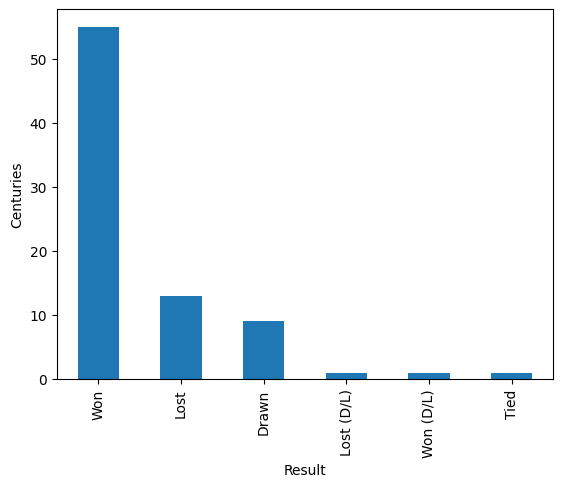

In [32]:
df['Result'].value_counts().plot(kind='bar')#, color=colors, edgecolor=colors)

plt.ylabel("Centuries")
plt.xlabel("Result")

plt.show()

BAR-PLOT OF TEAMS AGAINST WHICH KOHLI SCORED A TON

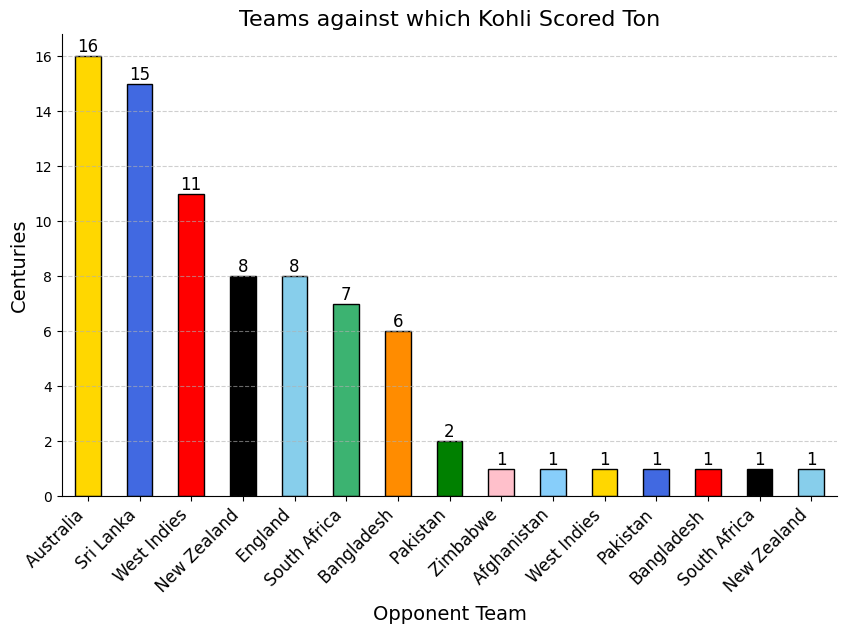

In [31]:
# Define custom colors for the bars
colors = ['gold', 'royalblue', 'red', 'black', 'skyblue', 'mediumseagreen', 'darkorange', 'green', 'pink', 'lightskyblue']

# Plot the barplot with custom colors and design
df['Against'].value_counts().plot(kind='bar', color=colors, edgecolor='black', figsize=(10, 6))

plt.title("Teams against which Kohli Scored Ton", fontsize=16)
plt.ylabel("Centuries", fontsize=14)
plt.xlabel("Opponent Team", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add data labels above the bars
for index, value in enumerate(df['Against'].value_counts()):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=12, color='black')

# Remove the top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a grid to the y-axis
plt.grid(axis='y', linestyle='--', alpha=0.6)


PIE-CHART DISTRIBUTION OF CENTURIES IN DIFFERENT GROUNDS

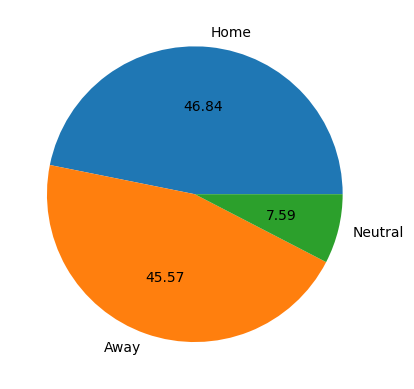

In [30]:
df['Ground'].value_counts().plot(kind='pie',autopct='%0.2f')
plt.ylabel("")  # This Line is Used to Remove the y-axis label for a pie chart
plt.show()


SCATTER PLOT OF VENUES AND CENTURIES.

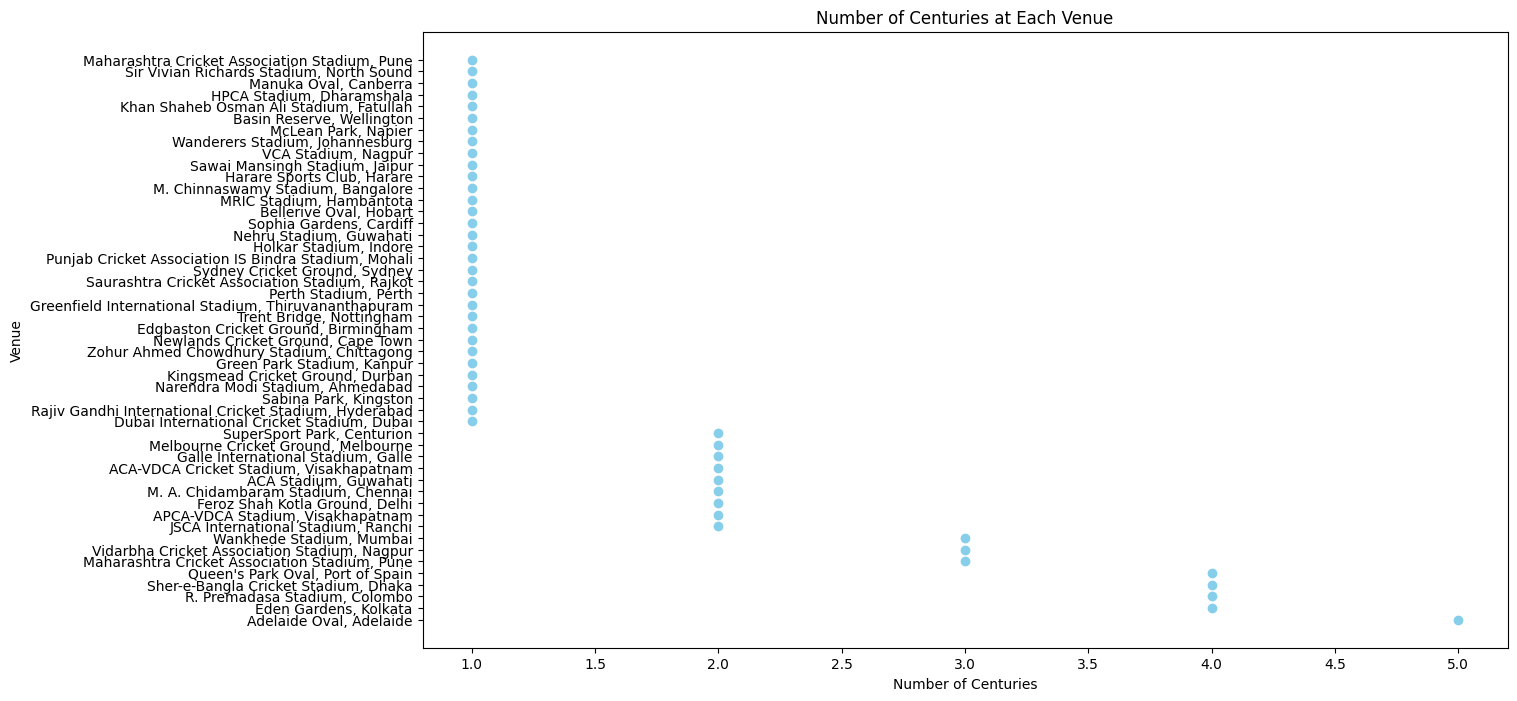

In [29]:
# Create a scatter plot for all venues
plt.figure(figsize=(14, 8))
plt.scatter(df['Venue'].value_counts(), df['Venue'].value_counts().index, color='skyblue')

# Set labels and title
plt.xlabel('Number of Centuries')
plt.ylabel('Venue')
plt.title('Number of Centuries at Each Venue')

# Show the plot
plt.show()

LINE PLOT OF CENTURIES OVER THE YEARS

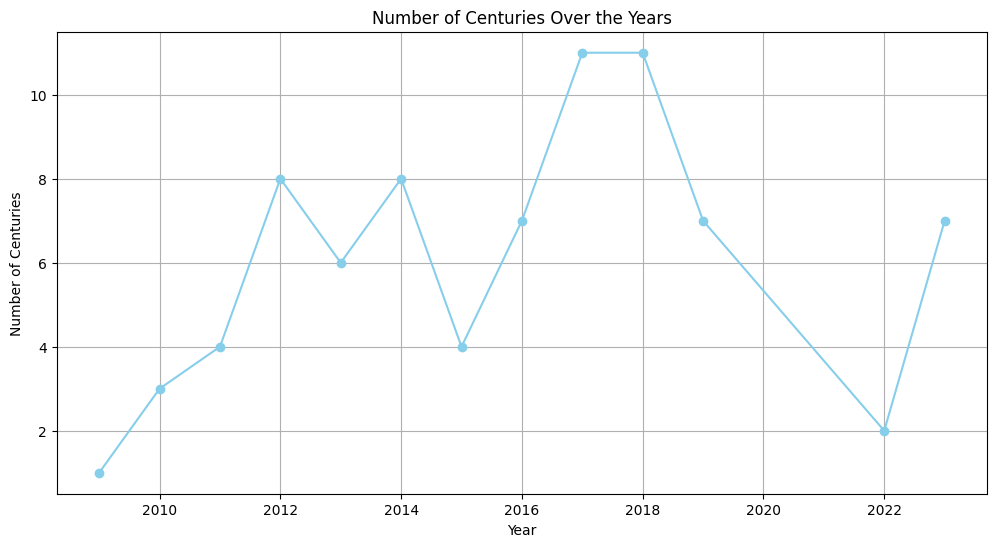

In [28]:
# Attempt to convert to datetime with errors='coerce'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for NaT (Not a Time) values
na_dates = df[df['Date'].isna()]['Date']

# Handle entries with a different format (if any)
for index in na_dates.index:
    na_date = na_dates.loc[index]
    
    # Check if na_date is NaT, skip if so
    if pd.isna(na_date):
        continue
    
    # Convert '05-Nov' to '05-Nov-21'
    df.at[index, 'Date'] = pd.to_datetime(str(na_date) + '-21', format='%d-%b-%y')

# Extract the year from the 'Date' column
df['Year'] = df['Date'].dt.year

# Group by year and count the number of centuries
centuries_per_year = df.groupby('Year')['No.'].count()

# Create a line plot
plt.figure(figsize=(12, 6))
centuries_per_year.plot(marker='o', color='skyblue', linestyle='-')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Number of Centuries')
plt.title('Number of Centuries Over the Years')

# Show the plot
plt.grid(True)
plt.show()


BI VARIENT ANALYSIS

CLUSTERED BAR PLOT

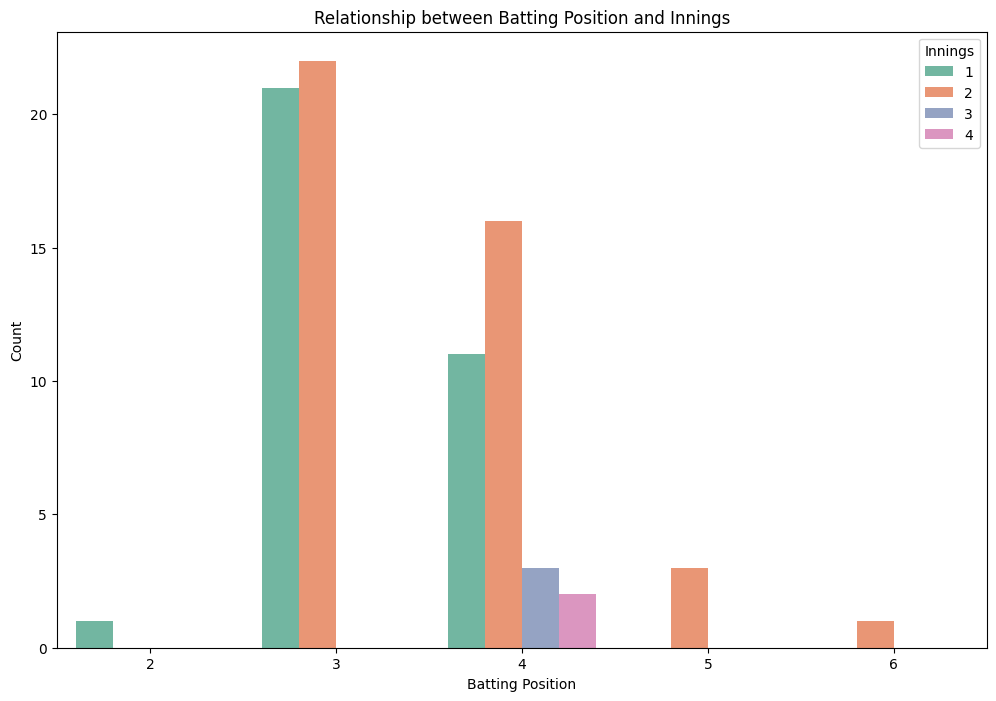

In [27]:
# Create a clustered bar plot
plt.figure(figsize=(12, 8))
sns.countplot(x='Position', hue='Innings', data=df, palette='Set2')

# Set labels and title
plt.xlabel('Batting Position')
plt.ylabel('Count')
plt.title('Relationship between Batting Position and Innings')

plt.show()


BOX-PLOT OF RUNS (WITHIN CENTURY) AT DIFFERENT BATTING POSITION

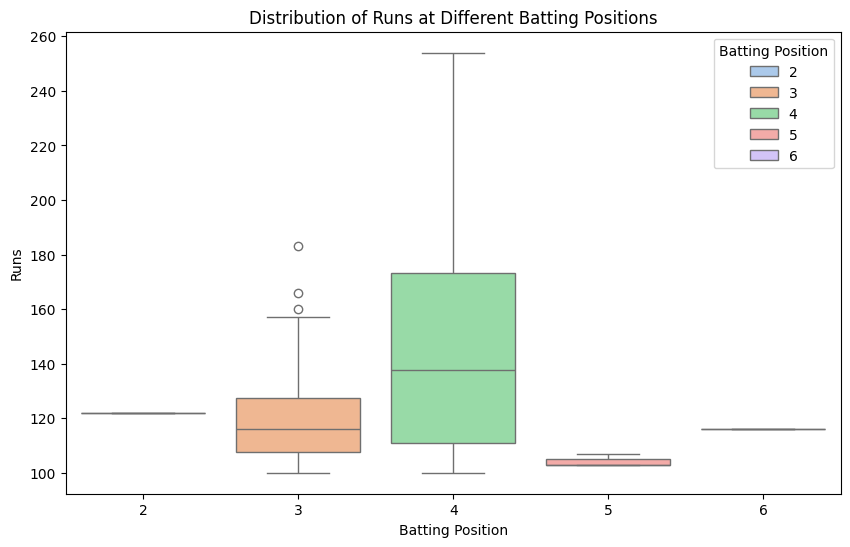

In [26]:
# Box plot: Runs vs. Batting Position
plt.figure(figsize=(10, 6))
sns.boxplot(x='Position', y='Runs', data=df, palette='pastel', hue='Position', dodge=False)

# Set labels and title
plt.xlabel('Batting Position')
plt.ylabel('Runs')
plt.title('Distribution of Runs at Different Batting Positions')

# Show the plot
plt.legend(title='Batting Position', loc='upper right')
plt.show()


DIST-PLOT OF RUNS VS BATTING POSITION OF VIRAT KOHLI

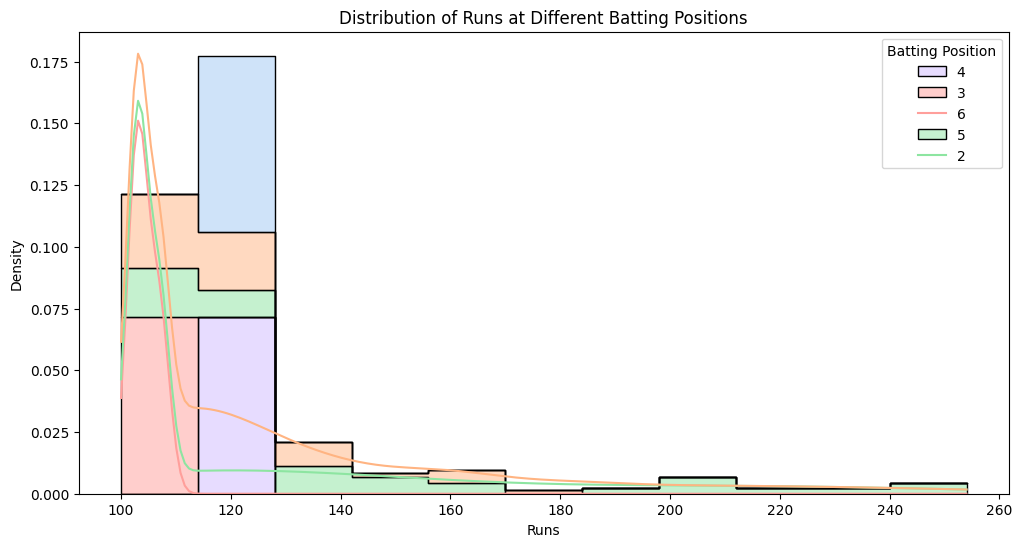

In [25]:
# Bivariate analysis: Runs vs. Batting Position using distplot
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Runs', hue='Position', multiple='stack', palette='pastel', kde=True,
element='step', stat='density', common_norm=False)

# Set labels and title
plt.xlabel('Runs')
plt.ylabel('Density')
plt.title('Distribution of Runs at Different Batting Positions')

# Manually set legend labels
plt.legend(title='Batting Position', labels=df['Position'].unique(), loc='upper right')

# Show the plot
plt.show()


MULTI VARIENT ANALYSIS

HEATMAP OF BATTING POSITION INNINGS AND MATCH RESULT

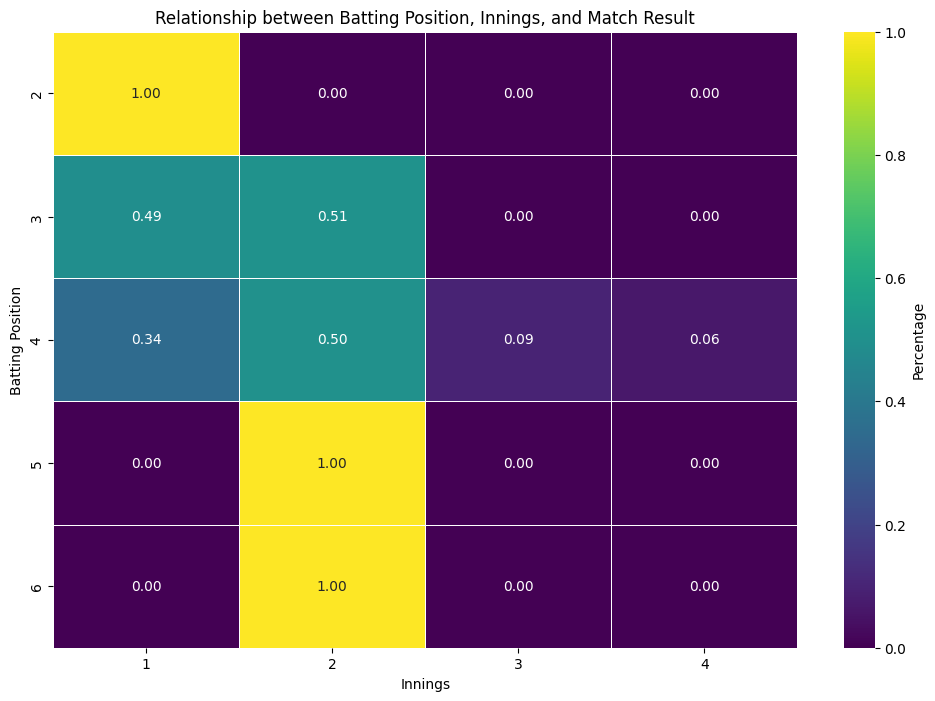

In [17]:
# Create a heatmap
heatmap_data = pd.crosstab(df['Position'], df['Innings'], values=df['Result'], aggfunc='count', normalize='index')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar_kws={"label": "Percentage"})

# Set labels and title
plt.xlabel('Innings')
plt.ylabel('Batting Position')
plt.title('Relationship between Batting Position, Innings, and Match Result')

#Show the plot
plt.show()


PAIR PLOT OF INNINGS RUNS AND POSITION

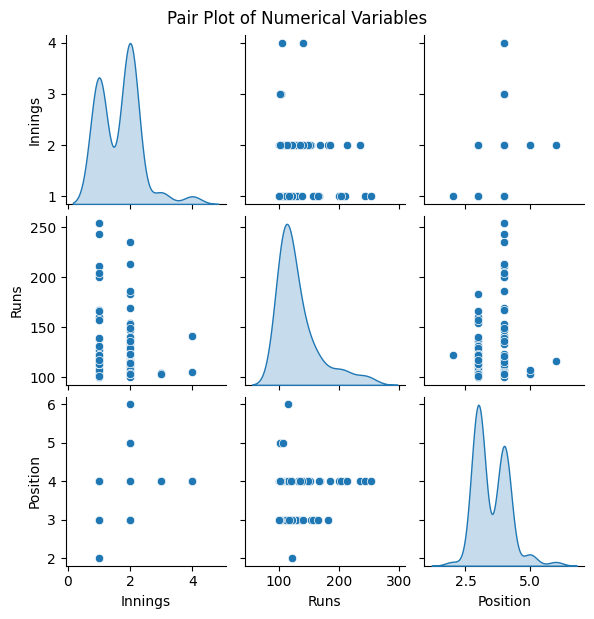

In [24]:
numerical_columns = ['Innings', 'Runs', 'Position']

# Create a pair plot
sns.pairplot(df[numerical_columns], height=2, diag_kind='kde')

# Set title
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)

# Show the plot
plt.show()


CLUSTERED HEATMAP OF RUNS POSITION INNINGS AND RESULT

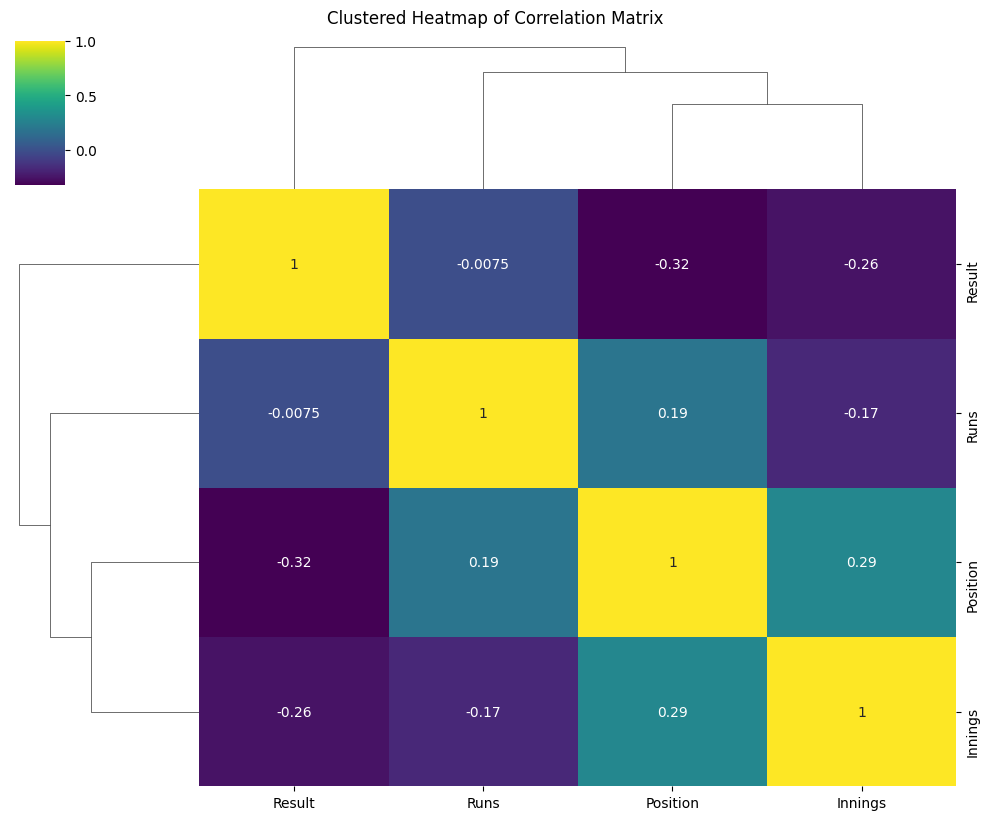

In [23]:
# Selecting relevant columns for the clustermap
cluster_data = df[['Runs', 'Position', 'Innings', 'Result']].copy()

# Convert categorical 'Result' variable to numerical for correlation analysis
cluster_data['Result'] = cluster_data['Result'].map({'Won': 1, 'Lost': 0, 'Drawn': 0, 'Tied': 0})

# Create a clustered heatmap
sns.clustermap(cluster_data.corr(), annot=True, cmap='viridis', figsize=(10, 8))

# Set title
plt.suptitle('Clustered Heatmap of Correlation Matrix', y=1.02)

# Show the plot
plt.show()


PAIR PLOT 

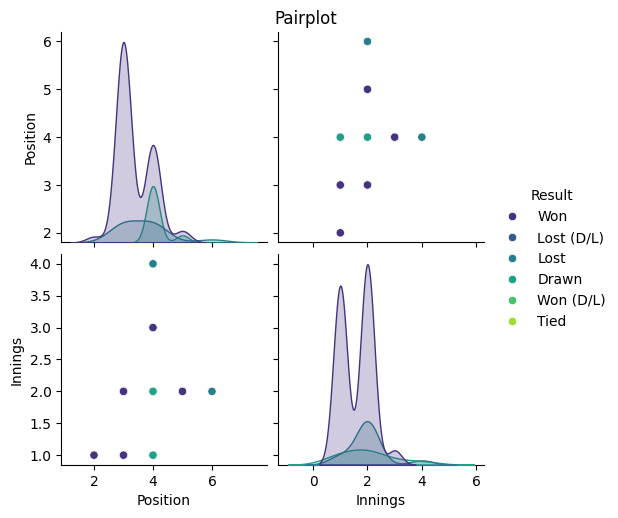

In [37]:
# Select relevant numeric columns for the pairplot
numeric_columns = ['Runs', 'Position', 'Innings']
pairplot_data = df[numeric_columns + ['Result']]

# Create a pairplot with 'hue' based on 'Result'
sns.pairplot(pairplot_data, hue='Result', markers='o', palette='viridis')

# Set title
plt.suptitle('Pairplot', y=1.02)

# Show the plot
plt.show()
